In [1]:
import os
import pandas as pd
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
os.listdir('../../../../Prototype/code/after_validation/saved_models/svm')

['svm_model_tuned.pkl']

In [11]:
os.listdir('../../..')

['code', 'dataset', 'extracted_features', 'images']

In [ ]:
../../../hyperparameter_tuning/svm/svm_selected_test_features.csv

In [8]:
selected_features=pd.read_csv('../../../../Prototype/code/hyperparameter_tuning/svm/svm_selected_test_features.csv')
selected_features.set_index('url',inplace=True)

In [9]:
selected_features

,https_true,url_hyphen_count,url_www_count,url_https_count,hostname_lenght,hostname_hyphen_count,hostname_digits_count,file_lenght,file_hyphen_count,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_ratio_a_int,html_hl_ratio_a_ext,html_hl_ratio_a_null,html_hl_ratio_src_other_ext,html_hl_external_css,html_unsafe_anchor,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,
http://20191018t003709-dot-wetransfer-auth-file7782.appspot.com/,0,4,0,0,56,4,18,0,0,0.000000,0.928571,0.071429,0.000000,0.000000,1.000000,1.000000,1.0,1,4,0.0
https://accounts.google.com/ServiceLogin?passive=1209600&osid=1&continue=https://plus.google.com/%2Bsouthernsavers&followup=https://plus.google.com/%2Bsouthernsavers,1,0,0,3,19,0,0,12,0,0.888889,0.111111,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0,10,0.0
https://jimwarholic.com/2007/05/forcing-comcast-to-new-ip-address-with.php,1,6,0,1,15,0,0,42,6,0.550562,0.449438,0.000000,0.480769,0.519231,0.000000,0.500000,1.0,1,3,1.0
https://www.easycalculation.com/analytical/perpendicular-bisector-line.php,1,2,1,1,23,0,0,31,2,0.911392,0.075949,0.012658,0.963636,0.018182,0.018182,0.625000,0.0,1,4,1.0
https://onlinkaoiuvrnow.com/mtbonline2020/redirect.html,1,0,0,1,19,0,0,13,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://en.wikipedia.org/wiki/Timeline_of_Amazon_Web_Services,1,0,0,1,16,0,0,31,0,0.802678,0.197322,0.000000,0.762281,0.237719,0.000000,0.000000,0.0,1,6,1.0
https://mail-w3redelivery.com/royalmail/secure.php?&amp;sessionid=$hash&amp;securessl=true,1,1,0,1,21,1,1,10,0,0.516129,0.451613,0.032258,0.350000,0.650000,0.000000,0.000000,0.0,1,0,0.0
http://najibafaiz.art/updsadtezi/Home/First-page/,0,1,0,0,14,0,0,0,0,0.956811,0.000000,0.043189,0.938389,0.000000,0.061611,0.000000,0.0,1,0,0.0


In [12]:
validation_df=pd.read_csv('../../../extracted_features/corrected_features/variance_cleanup_selected_features_corrected.csv')
validation_df.set_index('url',inplace=True)

In [13]:
features=validation_df.loc[:,'https_true':]
label=validation_df.loc[:,'phishing']

In [14]:
label

url
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx    0
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcviRevn2uu7Ap5Fo88PnsgrVYJsQwPinEYvVf9vEHagNczRu1U4Xd6a-9Xev1VJEQbGRlBy-OtWCvdBQp_UtFT1vDw4_Z5YVBEwHPn--fQDDIExhrBqkWi8s9-88eCrVou3rQ0FziQzp3nZghuMAY3c6hd-u9EynmpKB5LT76_A1k_AVgd_L7DVAFgM2F_1h1XebjZFgW5Yaqf80N95knoGwrs3iMhWNG5c7bXsUrWR87AqBR0         

In [15]:
features=features[selected_features.columns]

In [16]:
with open('../../../../Prototype/code/after_validation/saved_models/svm/svm_model_tuned.pkl', 'rb') as f:
    clf = pickle.load(f)

Accuracy: 0.7625178826895566
Recall: 0.6936836221352711


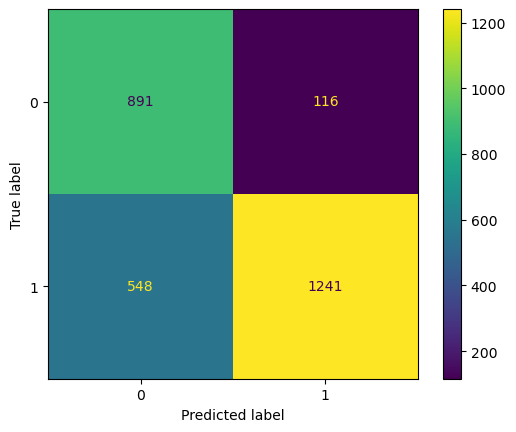

In [37]:
y_pred = clf.predict(features)
print("Accuracy:",metrics.accuracy_score(label, y_pred))
print("Recall:",metrics.recall_score(label, y_pred))
conf_mat = confusion_matrix(label,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
#plt.savefig('../../images/svm/validation',dpi=300, bbox_inches = "tight")

Accuracy: 0.7592989985693849
Recall: 0.6847400782560089


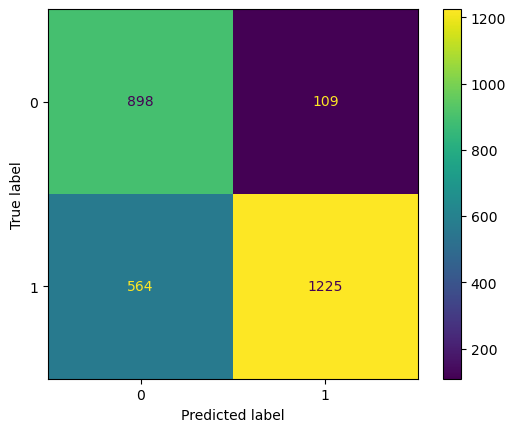

In [19]:
y_pred = clf.predict(features)
print("Accuracy:",metrics.accuracy_score(label, y_pred))
print("Recall:",metrics.recall_score(label, y_pred))
conf_mat = confusion_matrix(label,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../images/svm/validation_corrected',dpi=300, bbox_inches = "tight")